In [91]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [95]:
n_comp = 6

# import de l'échantillon
d1 = pd.read_csv("decathlon.csv")
data = pd.read_csv("rang.csv")
# d2.merge(d1,on='Unnamed: 0',how='left')

In [96]:
# préparation des données pour l'ACP
data_pca = data.fillna(data.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data.values
# names = data["il faut remplacer ici par le champs intituler"] # ou data.index pour avoir les intitulés
features = data.columns

In [97]:
features

Index(['Unnamed: 0', 'X100m', 'Long.jump', 'Shot.put', 'High.jump', 'X400m',
       'X110m.hurdle', 'Discus', 'Pole.vault', 'Javeline', 'X1500m', 'Rank',
       'Points', 'Competition'],
      dtype='object')

In [98]:
X[:, 1:]

array([[11.04, 7.58, 14.83, 2.07, 49.81, 14.69, 43.75, 5.02, 63.19,
        291.7, 1, 8217, 'Decastar'],
       [10.76, 7.4, 14.26, 1.86, 49.37, 14.05, 50.72, 4.92, 60.15, 301.5,
        2, 8122, 'Decastar'],
       [11.02, 7.23, 14.25, 1.92, 48.93, 14.99, 40.87, 5.32, 62.77,
        280.1, 4, 8067, 'Decastar'],
       [11.34, 7.09, 15.19, 2.1, 50.42, 15.31, 46.26, 4.72, 63.44, 276.4,
        5, 8036, 'Decastar'],
       [11.13, 7.3, 13.48, 2.01, 48.62, 14.17, 45.67, 4.42, 55.37, 268.0,
        7, 8004, 'Decastar'],
       [10.83, 7.31, 13.76, 2.13, 49.91, 14.38, 44.41, 4.42, 56.37,
        285.1, 8, 7995, 'Decastar'],
       [11.64, 6.81, 14.57, 1.95, 50.14, 14.93, 47.6, 4.92, 52.33, 262.1,
        9, 7802, 'Decastar'],
       [11.37, 7.56, 14.41, 1.86, 51.1, 15.06, 44.99, 4.82, 57.19, 285.1,
        10, 7733, 'Decastar'],
       [11.33, 6.97, 14.09, 1.95, 49.48, 14.48, 42.1, 4.72, 55.4, 282.0,
        11, 7708, 'Decastar'],
       [11.33, 7.27, 12.68, 1.98, 49.2, 15.29, 37.92, 4.62, 

In [101]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X[:, 1:-1])
X_scaled = std_scale.transform(X[:, 1:-1])

In [102]:
n_comp = 6
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)


PCA(n_components=6)

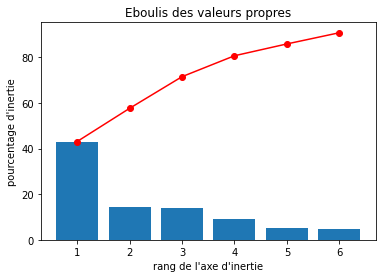

In [103]:
# Eboulis des valeurs propres
display_scree_plot(pca)


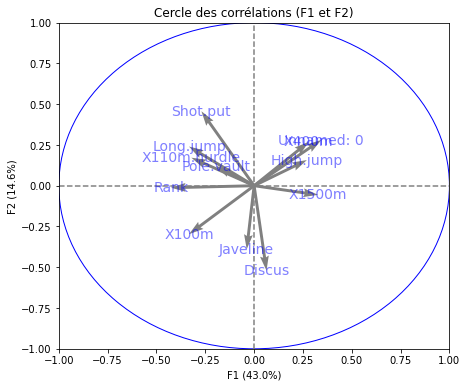

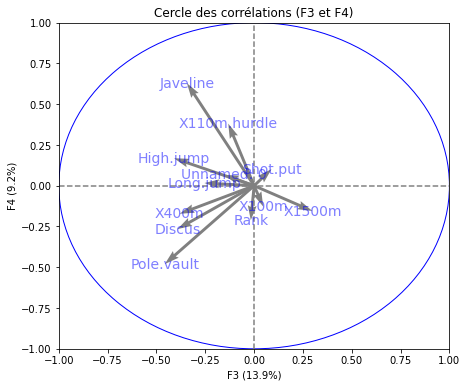

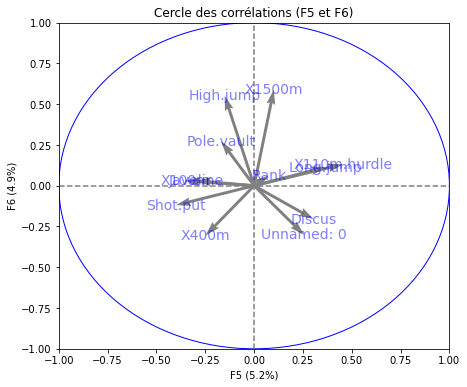

In [104]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

<Figure size 7200x7200 with 0 Axes>

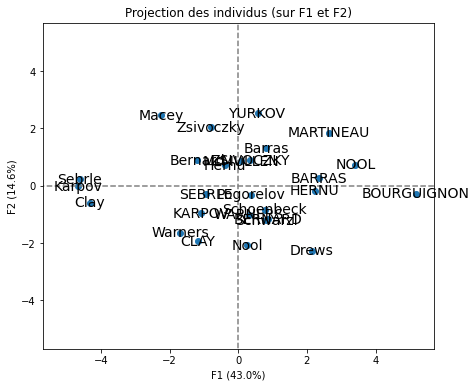

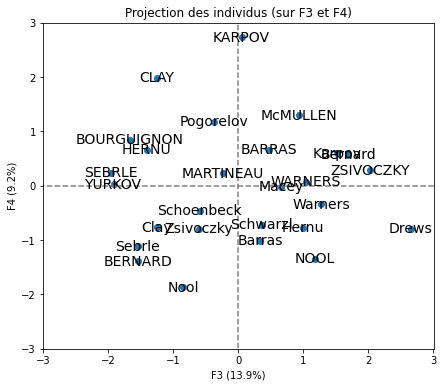

In [112]:
names = data["Unnamed: 0"] # ou data.index pour avoir les intitulés
# Projection des individus
plt.figure(figsize=(100, 100))
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1), (2, 3)], labels = np.array(names))
plt.show()

In [106]:
data.head()

,Unnamed: 0,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
3,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
4,ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
